# SALES PREDICTION  TASK5

# Definition of the problem 
The purpose of this project is to estimate hte sales by utilising Support Vector Regressor (SVR) and finding the category's highest R-square value by dividing the data into training and testing samples.

## Import basic libraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore') 

## Read the given Advertising data set 

In [35]:
advertising = pd.read_csv("Advertising (1).csv")
advertising

Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]

In [36]:
advertising.shape

(200, 5)

In [37]:
len(advertising)

200

# About given Advertising dataset details 
- in this dataset we have three independent variables(i.e; TV, Radio, Newspaper)
- and anethore one is our target variable(i.e; Sales)
- the given dataset having a 200 rows and 5 columns 
- in this 5 columns we have one unwanted column that is Unnamed: 0

## Exploratory Data Analysis(EDA)

In [38]:
advertising.head()

Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

In [39]:
advertising.tail()

Unnamed: 0     TV  Radio  Newspaper  Sales
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

In [40]:
# Checking null values 
advertising.isna().any()

Unnamed: 0    False
TV            False
Radio         False
Newspaper     False
Sales         False
dtype: bool

In [41]:
advertising.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [42]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [43]:
advertising.dtypes

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object

In [44]:
advertising.nunique()

Unnamed: 0    200
TV            190
Radio         167
Newspaper     172
Sales         121
dtype: int64

In [46]:
advertising = advertising.drop(columns = ["Unnamed: 0"])

In [47]:
advertising

TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]

# Data Visualization 
- scatter plots
- pair plots

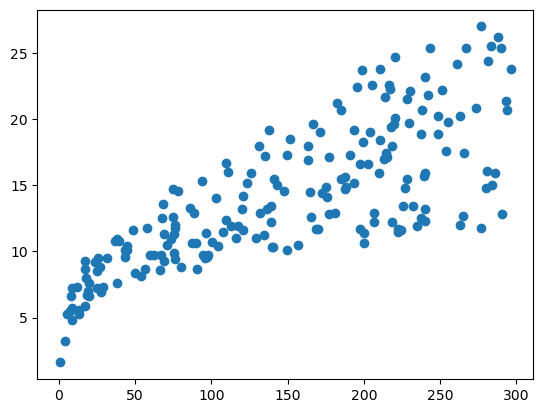

In [49]:
plt.scatter(advertising['TV'],advertising["Sales"])
plt.show()

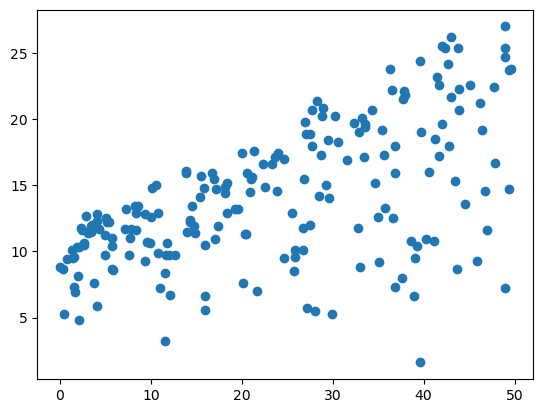

In [50]:
plt.scatter(advertising['Radio'],advertising["Sales"])
plt.show()

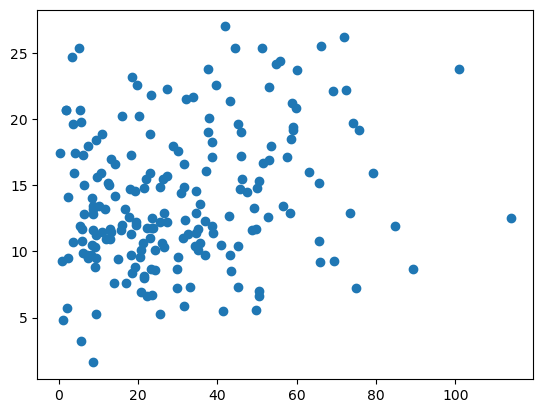

In [51]:
plt.scatter(advertising['Newspaper'],advertising["Sales"])
plt.show()

In [52]:
# checking correlation 
advertising.corr()

TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000

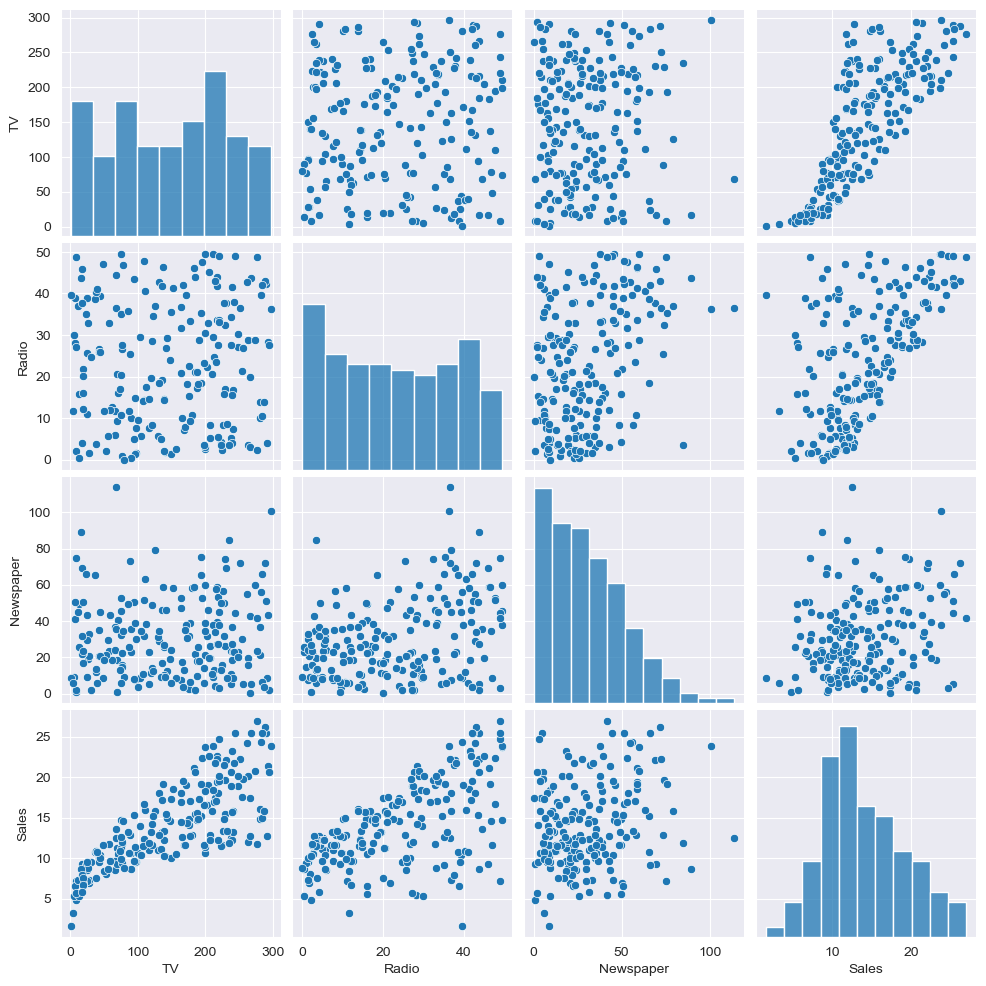

In [53]:
sns.set_style(style='darkgrid')
sns.pairplot(advertising)

# Deviding the dataset into independetnt(x) and dependent(y) variables

In [54]:
x = advertising.drop('Sales', axis=1) 
x

TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]

In [55]:
y = advertising['Sales']
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

## splinting the data into train and test 

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y , test_size=0.2,random_state=42)

In [57]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(160, 3) (40, 3) (160,) (40,)


# Fitt a model Support Vector Regressor(SVR)

In [60]:
# create an instance of the SVM
from sklearn.svm import SVR
model = SVR(kernel='linear', C=1)

In [61]:
# fit the classifier to the training data
model.fit(x_train, y_train)

SVR(C=1, kernel='linear')

## Prediction 

In [62]:
# make predictions on the test data
y_pred = model.predict(x_test)
y_pred

array([16.71240319, 21.33768657, 21.55587682, 11.35326146, 22.69731264,
       13.65527803, 21.4967151 ,  7.87499255, 13.5401414 , 15.38655278,
        9.73567176,  6.93418197, 13.99828916,  9.69531453,  9.74523556,
       12.1973029 ,  9.38643591, 16.51773762, 10.70123332, 19.06158634,
       19.64937507, 13.62170143, 13.18505675, 21.41070723,  8.22961006,
        6.07633291, 21.16907752, 12.26176694,  9.48967835,  9.28138656,
       12.4118661 , 10.49371426, 21.82524308, 12.91743297, 18.12505532,
       20.47769439, 14.98260992, 20.84911875, 11.36736565,  4.89153565])

## Evaluate the performance of the given advertising data set
- mean square error(mse)
- root mean square error(rmse)
- r square(r^2)

In [66]:
# calculate the accuracy of the regression 
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

Mean squared error: 3.60341998021955


In [67]:
# root mean square error(rmse)
import math 
rmse = math.sqrt(mse)
print('Root mean square error:', rmse)

Root mean square error: 1.8982676260789864


In [68]:
# r square(r^2)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('R_square:', r2)

R_square: 0.8858361944219502


# My  R_square value is  88%